# Generates the random numbers for Monte Carlo Simulation for Rocket Launch
- Generates a random assortment of rocket parameters and stores it as a .txt file
- Randomizes parameters based on Varied Parameters.xlsx


In [127]:
import csv
import numpy as np
from random import gauss, uniform
import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib as mpl

import orlab as orl

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['mathtext.fontset'] = 'cm'

In [128]:
varied_parameter_names = [
    'Wind Speed',
    'Wind Direction',
    'Air Temperature',
    'Air Pressure',
    'Nose Cone Mass',
    'Nose Cone Shape Parameter',
    'Nose Cone Length',
    'Forward Body Tube Mass',
    'Middle Body Tube Mass',
    'Aft Body Tube Mass',
    'Forward Body Tube Length',
    'Middle Body Tube Length',
    'Aft Body Tube Length',
    'Forward Body Tube Outer Diameter',
    'Middle Body Tube Outer Diameter',
    'Aft Body Tube Outer Diameter',
    'Fin Shape',
    'Launch Rod Cant',
    'Launch Rod Direction'
]

varied_parameter_type = [
    'Environmental',
    'Environmental',
    'Environmental',
    'Environmental',
    'NASA Nose Cone',
    'NASA Nose Cone',
    'NASA Nose Cone',
    'NASA Forward Body',
    'NASA Middle Body',
    'NASA Aft Body',
    'NASA Forward Body',
    'NASA Middle Body',
    'NASA Aft Body',
    'NASA Forward Body',
    'NASA Middle Body',
    'NASA Aft Body',
    'Geometric',
    'Fin Name',
    'Launch Properties'
]

varied_parameter_distributions = [
    'Constant',
    'Uniform',
    'Uniform',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Gaussian',
    'Constant',
    'Uniform',
    'Constant'
]

varied_parameter_values = [
    [0, 5, 10, 15, 20], # Wind speed, mph
    [0, 360], # Wind direction, deg
    [286, 302], # Air temperature, K
    [101325, 500], # Air pressure, Pa
    [2.2, 0.01], # Nose cone mass, lbs
    [0, 0.01], # Nose cone shape parameter
    [28.5, 0.1], # Nose cone length, in
    [2.7, 0.01], # Forward body tube mass, lbs
    [1.9, 0.01], # Middle body tube mass, lbs
    [3.4, 0.01], # Aft body tube mass, lbs
    [26, 0.1], # Forward body tube length, in
    [34, 0.1], # Middle body tube length, in
    [42, 0.1], # Aft body tube length, in
    [6.125, 0.01], # Forward body tube outer diameter, in
    [6.125, 0.01], # Middle body tube outer diameter, in
    [6.125, 0.01], # Aft body tube outer diameter, in
    ['Trapezoidal', 'Elliptical', 'Parallelogram', 'Swept Trapezoidal'], # Fin shape
    [5, 10], # Launch rod cant
    [0, 45, 90] # Launch rod direction
]

# Converting units to MKS
varied_parameter_values[0] = [x * 0.44704 for x in varied_parameter_values[0]] # Wind speed, m/s
varied_parameter_values[4] = [x * 0.453592 for x in varied_parameter_values[4]] # Nose cone mass, kg
varied_parameter_values[6] = [x * 0.0254 for x in varied_parameter_values[6]] # Nose cone length, m
varied_parameter_values[7] = [x * 0.453592 for x in varied_parameter_values[7]] # Forward body tube mass, kg
varied_parameter_values[8] = [x * 0.453592 for x in varied_parameter_values[8]] # Middle body tube mass, kg
varied_parameter_values[9] = [x * 0.453592 for x in varied_parameter_values[9]] # Aft body tube mass, kg
varied_parameter_values[10] = [x * 0.0254 for x in varied_parameter_values[10]] # Forward body tube length, m
varied_parameter_values[11] = [x * 0.0254 for x in varied_parameter_values[11]] # Middle body tube length, m
varied_parameter_values[12] = [x * 0.0254 for x in varied_parameter_values[12]] # Aft body tube length, m
varied_parameter_values[13] = [x * 0.0254 for x in varied_parameter_values[13]] # Forward body tube outer diameter, m
varied_parameter_values[14] = [x * 0.0254 for x in varied_parameter_values[14]] # Middle body tube outer diameter, m
varied_parameter_values[15] = [x * 0.0254 for x in varied_parameter_values[15]] # Aft body tube outer diameter, m

In [129]:
print(len(varied_parameter_names))
print(len(varied_parameter_type))
print(len(varied_parameter_distributions))
print(len(varied_parameter_values))

19
19
19
19


In [130]:
samples = 1000

wind_speed = 5 # mph
fin_shape = 'Trapezoidal'
launch_rod_direction = 0 # degrees

with open('monte_carlo_parameters.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(varied_parameter_names)
    
    for i in range(samples):
        row = []

        for j in range(len(varied_parameter_names)):

            if varied_parameter_distributions[j] == 'Gaussian':
                mean = varied_parameter_values[j][0]
                stddev = varied_parameter_values[j][1]
                value = gauss(mean, stddev)

            elif varied_parameter_distributions[j] == 'Uniform':
                low = varied_parameter_values[j][0]
                high = varied_parameter_values[j][1]
                value = uniform(low, high)

            elif varied_parameter_distributions[j] == 'Constant':
                if varied_parameter_names[j] == 'Wind Speed':
                    value = wind_speed / 2.237 # Convert mph to m/s

                elif varied_parameter_names[j] == 'Fin Shape':
                    value = fin_shape

                elif varied_parameter_names[j] == 'Launch Rod Direction':
                    value = launch_rod_direction

            row.append(value)

        writer.writerow(row)

In [140]:
def unpickler(path):
    with open(path, 'rb') as file:
        return pkl.load(file)

In [141]:
trap_data = unpickler('./trap_monte_carlo_data.pkl')
trap_events = unpickler('./trap_monte_carlo_events.pkl')

ellip_data = unpickler('./ellip_monte_carlo_data.pkl')
ellip_events = unpickler('./ellip_monte_carlo_events.pkl')

swept_data = unpickler('./swept_monte_carlo_data.pkl')
swept_events = unpickler('./swept_monte_carlo_events.pkl')

tapswept_data = unpickler('./tapswept_monte_carlo_data.pkl')
tapswept_events = unpickler('./tapswept_monte_carlo_events.pkl')

In [77]:
trap_apogee_times = []
trap_apogee_altitudes = []
trap_max_velocity = []
trap_max_acceleration = []
trap_off_rod_velocity = []
trap_full_flight_duration = []
trap_ground_hit_velocity = []
trap_off_rod_stability = []

for sim, event in zip(trap_data, trap_events):
    trap_apogee_times.append(event[orl.FlightEvent.APOGEE])
    trap_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    trap_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    trap_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    trap_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    trap_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    trap_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    trap_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

ellip_apogee_times = []
ellip_apogee_altitudes = []
ellip_max_velocity = []
ellip_max_acceleration = []
ellip_off_rod_velocity = []
ellip_full_flight_duration = []
ellip_ground_hit_velocity = []
ellip_off_rod_stability = []

for sim, event in zip(ellip_data, ellip_events):
    ellip_apogee_times.append(event[orl.FlightEvent.APOGEE])
    ellip_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    ellip_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    ellip_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    ellip_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    ellip_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    ellip_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    ellip_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

swept_apogee_times = []
swept_apogee_altitudes = []
swept_max_velocity = []
swept_max_acceleration = []
swept_off_rod_velocity = []
swept_full_flight_duration = []
swept_ground_hit_velocity = []
swept_off_rod_stability = []

for sim, event in zip(swept_data, swept_events):
    swept_apogee_times.append(event[orl.FlightEvent.APOGEE])
    swept_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    swept_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    swept_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    swept_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    swept_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    swept_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    swept_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

tapswept_apogee_times = []
tapswept_apogee_altitudes = []
tapswept_max_velocity = []
tapswept_max_acceleration = []
tapswept_off_rod_velocity = []
tapswept_full_flight_duration = []
tapswept_ground_hit_velocity = []
tapswept_off_rod_stability = []

for sim, event in zip(tapswept_data, tapswept_events):
    tapswept_apogee_times.append(event[orl.FlightEvent.APOGEE])
    tapswept_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    tapswept_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    tapswept_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    tapswept_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    tapswept_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    tapswept_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    tapswept_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

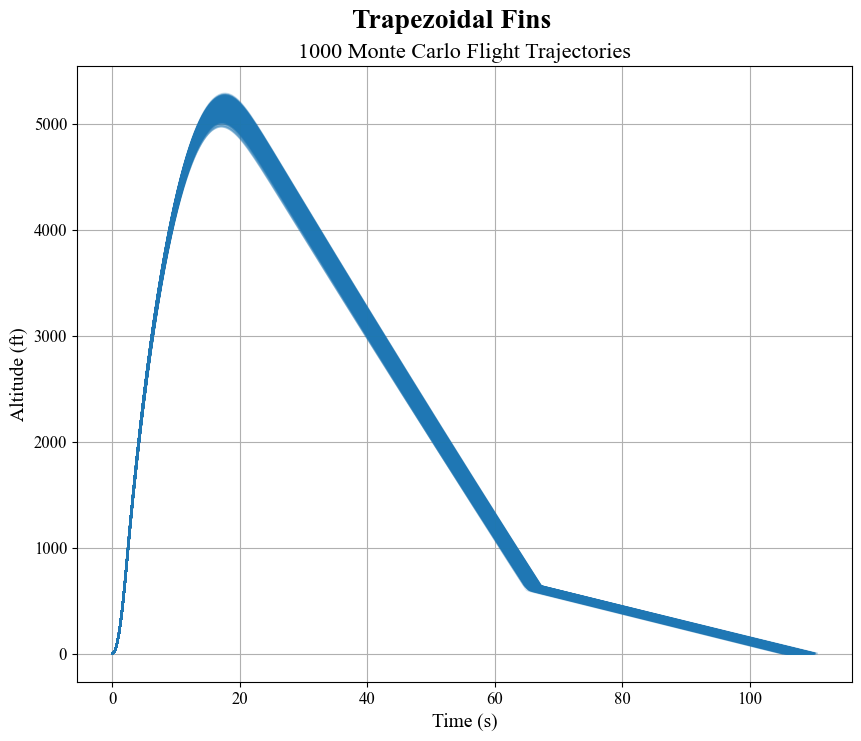

In [142]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Trapezoidal Fins', y=0.95)

for i, (sim, event) in enumerate(zip(trap_data, trap_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', label='Trapezoidal Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

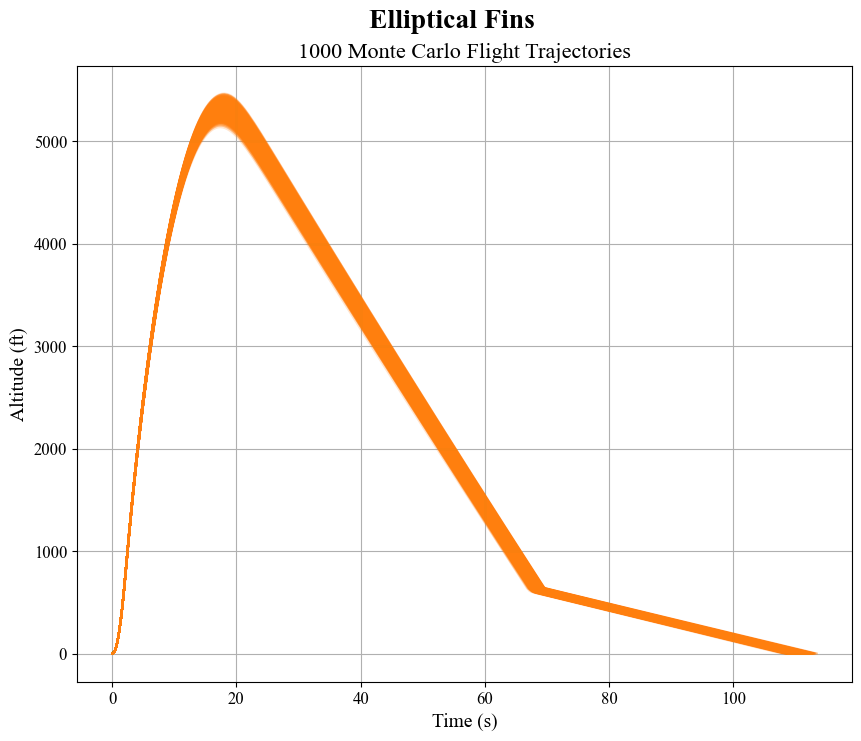

In [143]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Elliptical Fins', y=0.95)

for i, (sim, event) in enumerate(zip(ellip_data, ellip_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', label='Elliptical Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

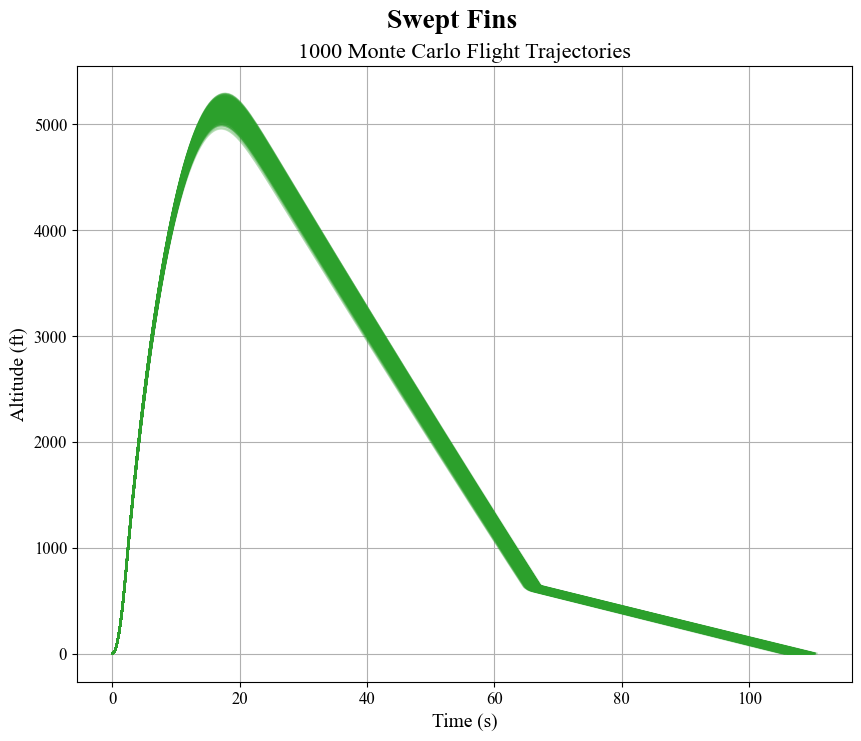

In [144]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Swept Fins', y=0.95)

for i, (sim, event) in enumerate(zip(swept_data, swept_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', label='Swept Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

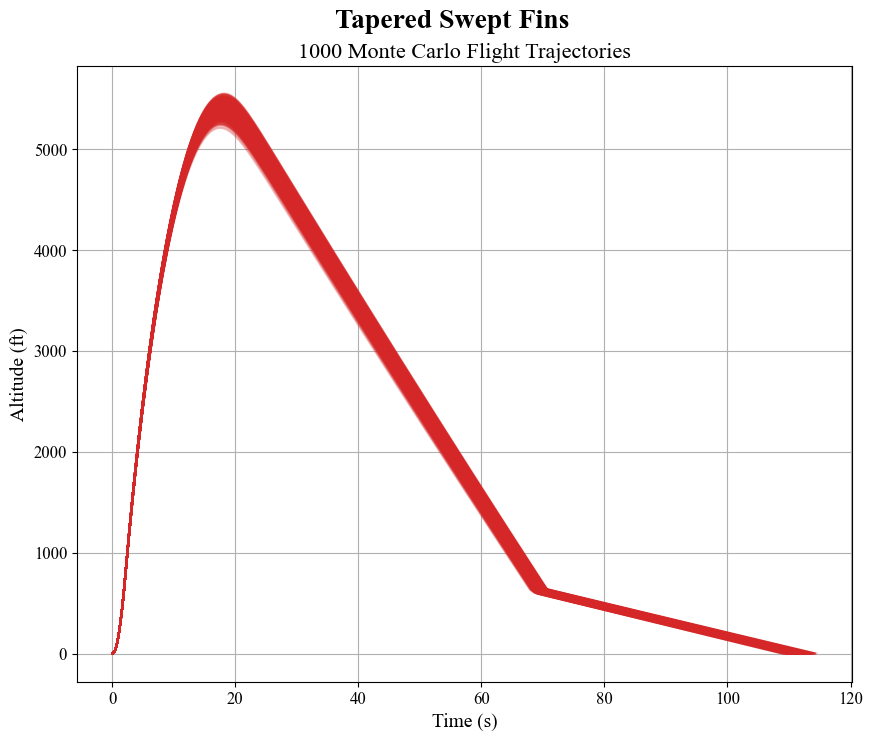

In [145]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Tapered Swept Fins', y=0.95)

for i, (sim, event) in enumerate(zip(tapswept_data, tapswept_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', label='Tapered Swept Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

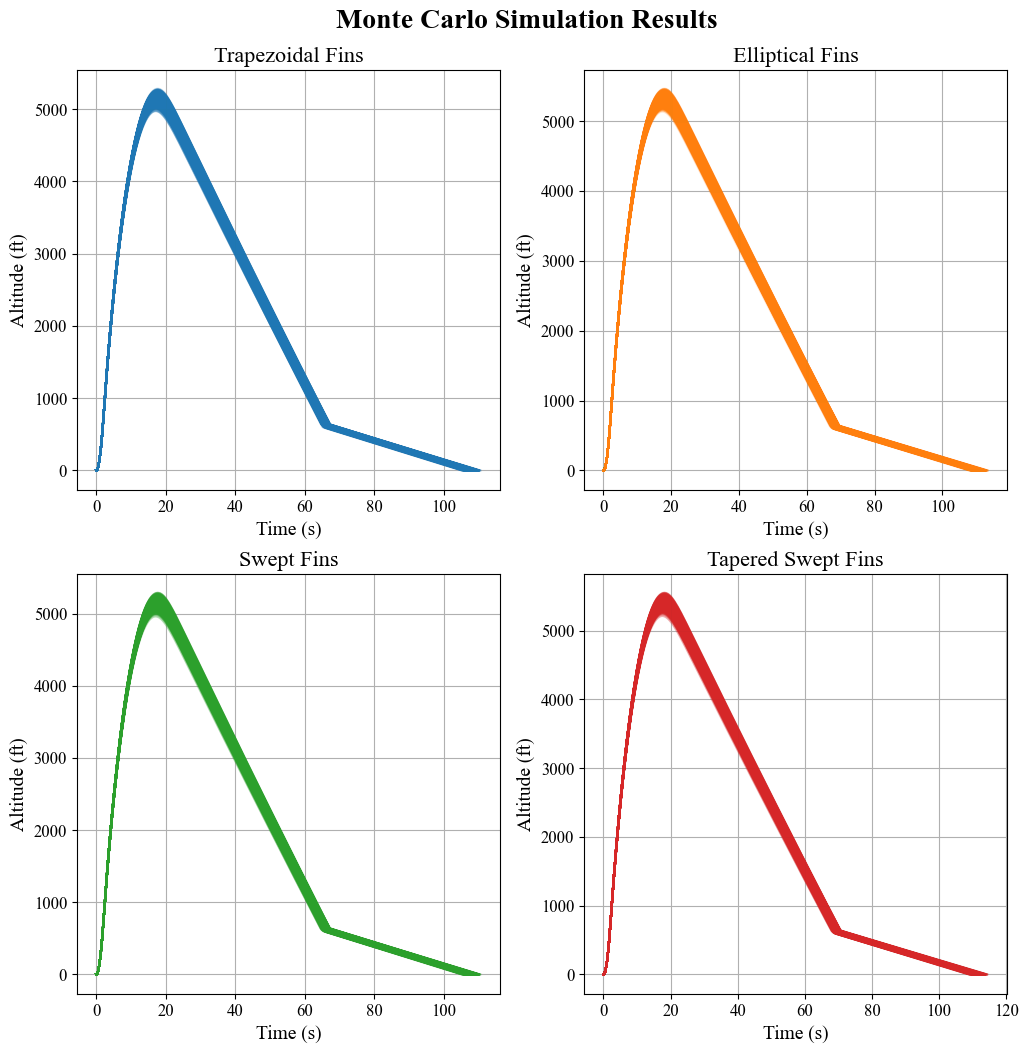

In [169]:
fig = plt.figure(figsize=(12, 12))
axes = fig.subplots(2, 2)

fig.suptitle('Monte Carlo Simulation Results', y=0.93)

for i, (sim, event) in enumerate(zip(trap_data, trap_events)):
    if i == 0:
        axes[0, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', label='Trapezoidal Fin', alpha=0.2) # Convert to feet
    else:
        axes[0, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', alpha=0.2) # Convert to feet

for i, (sim, event) in enumerate(zip(ellip_data, ellip_events)):
    if i == 0:
        axes[0, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', label='Elliptical Fin', alpha=0.2) # Convert to feet
    else:
        axes[0, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', alpha=0.2) # Convert to feet

for i, (sim, event) in enumerate(zip(swept_data, swept_events)):
    if i == 0:
        axes[1, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', label='Swept Fin', alpha=0.2) # Convert to feet
    else:
        axes[1, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', alpha=0.2) # Convert to feet

for i, (sim, event) in enumerate(zip(tapswept_data, tapswept_events)):
    if i == 0:
        axes[1, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', label='Tapered Swept Fin', alpha=0.2) # Convert to feet
    else:
        axes[1, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', alpha=0.2) # Convert to feet

axes[0, 0].set_title('Trapezoidal Fins')
axes[0, 1].set_title('Elliptical Fins')
axes[1, 0].set_title('Swept Fins')
axes[1, 1].set_title('Tapered Swept Fins')

for ax in axes.flat:
    ax.grid()
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Altitude (ft)')
    # ax.legend()

fig.savefig('Flight Trajectories Together.png', dpi=500, bbox_inches='tight')

plt.show()

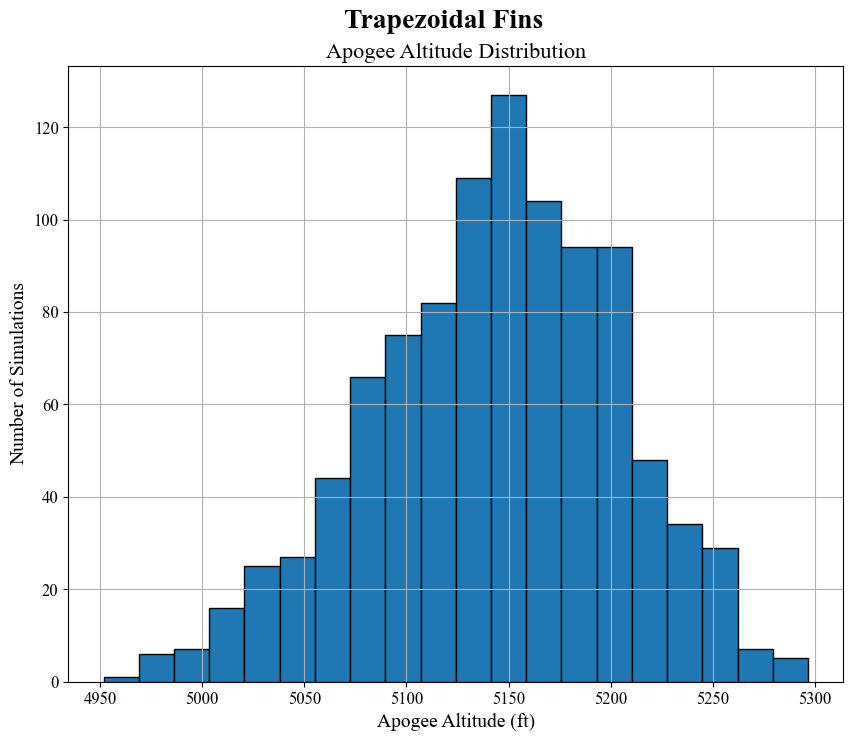

In [170]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Trapezoidal Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(trap_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:blue')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

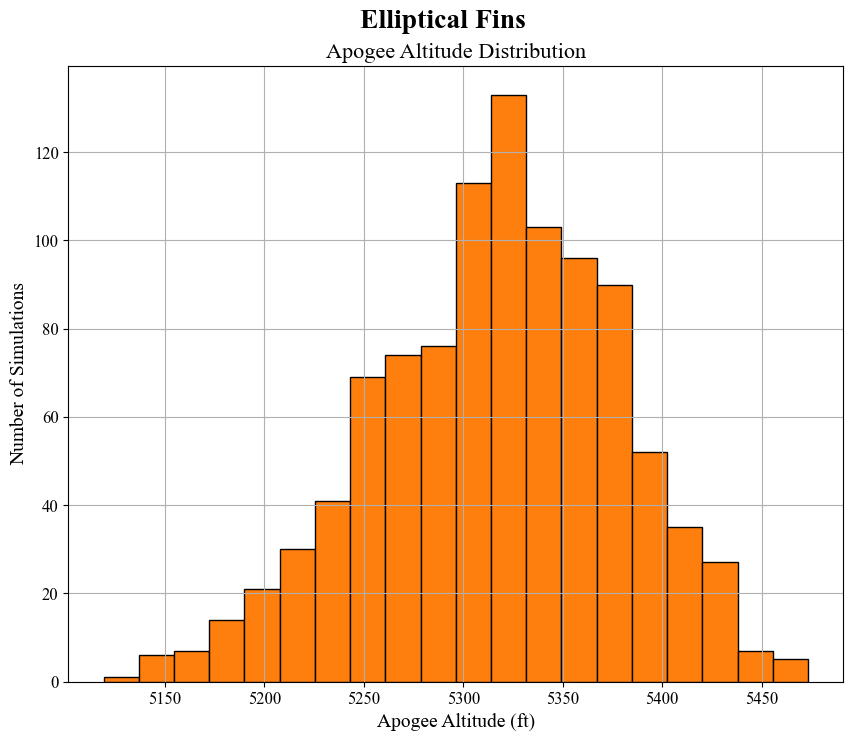

In [171]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Elliptical Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(ellip_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:orange')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

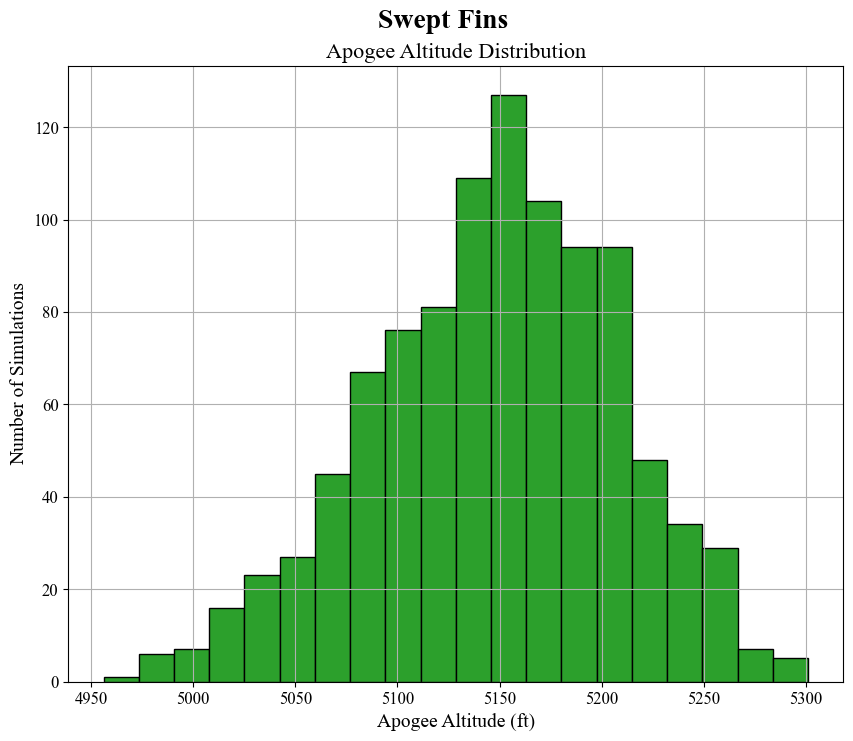

In [172]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Swept Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(swept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:green')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

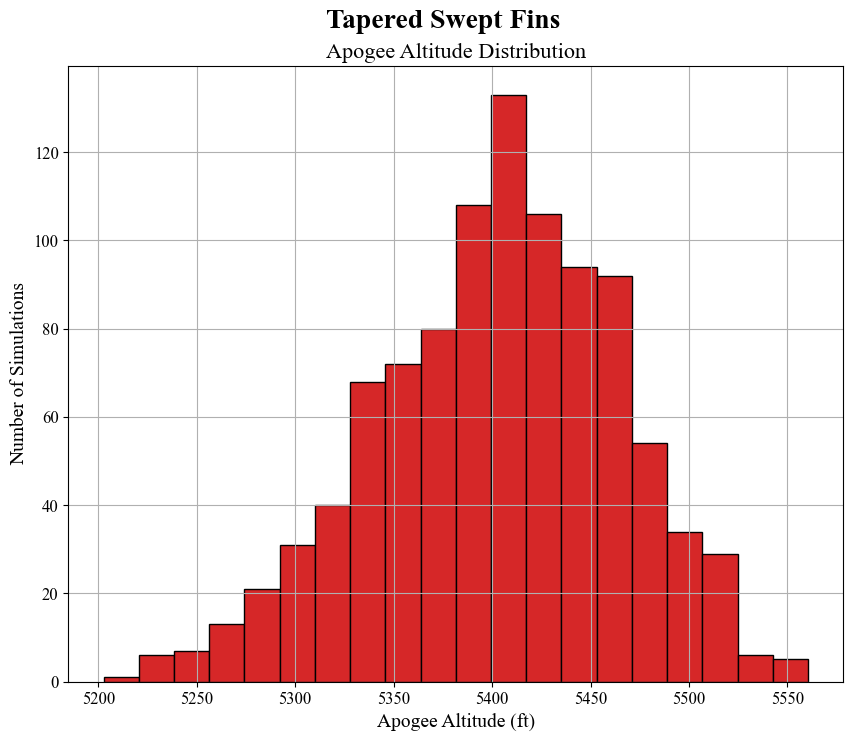

In [173]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Tapered Swept Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(tapswept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:red')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

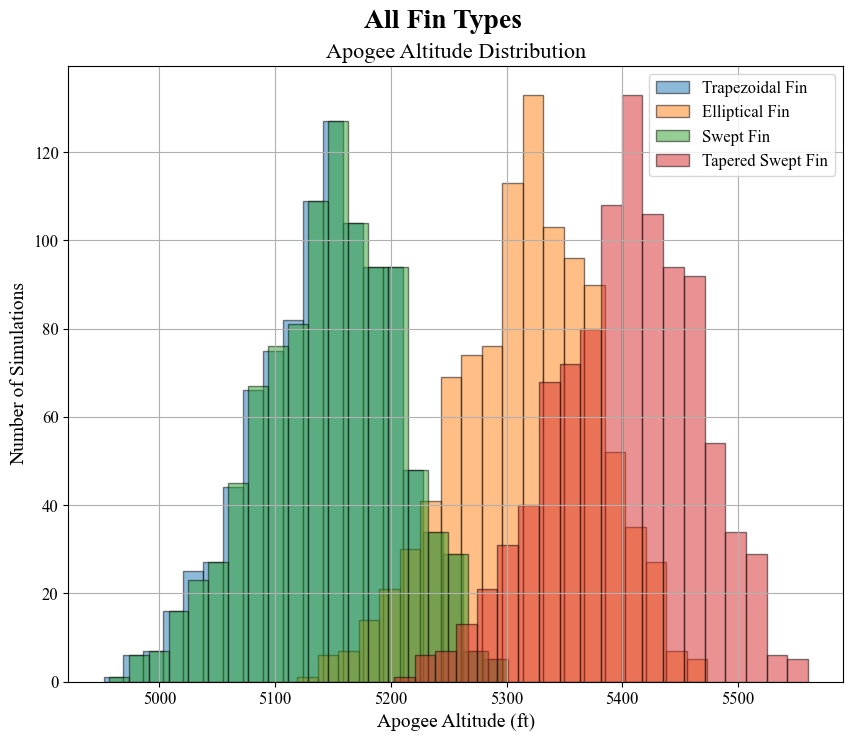

In [174]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('All Fin Types', y=0.95)

ax.hist(trap_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Trapezoidal Fin')
ax.hist(ellip_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Elliptical Fin')
ax.hist(swept_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Swept Fin')
ax.hist(tapswept_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Tapered Swept Fin')

ax.grid()
ax.set_title('Apogee Altitude Distribution')
ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')
ax.legend()

fig.savefig('Apogee Distributions Together.png', dpi=500, bbox_inches='tight')

plt.show()

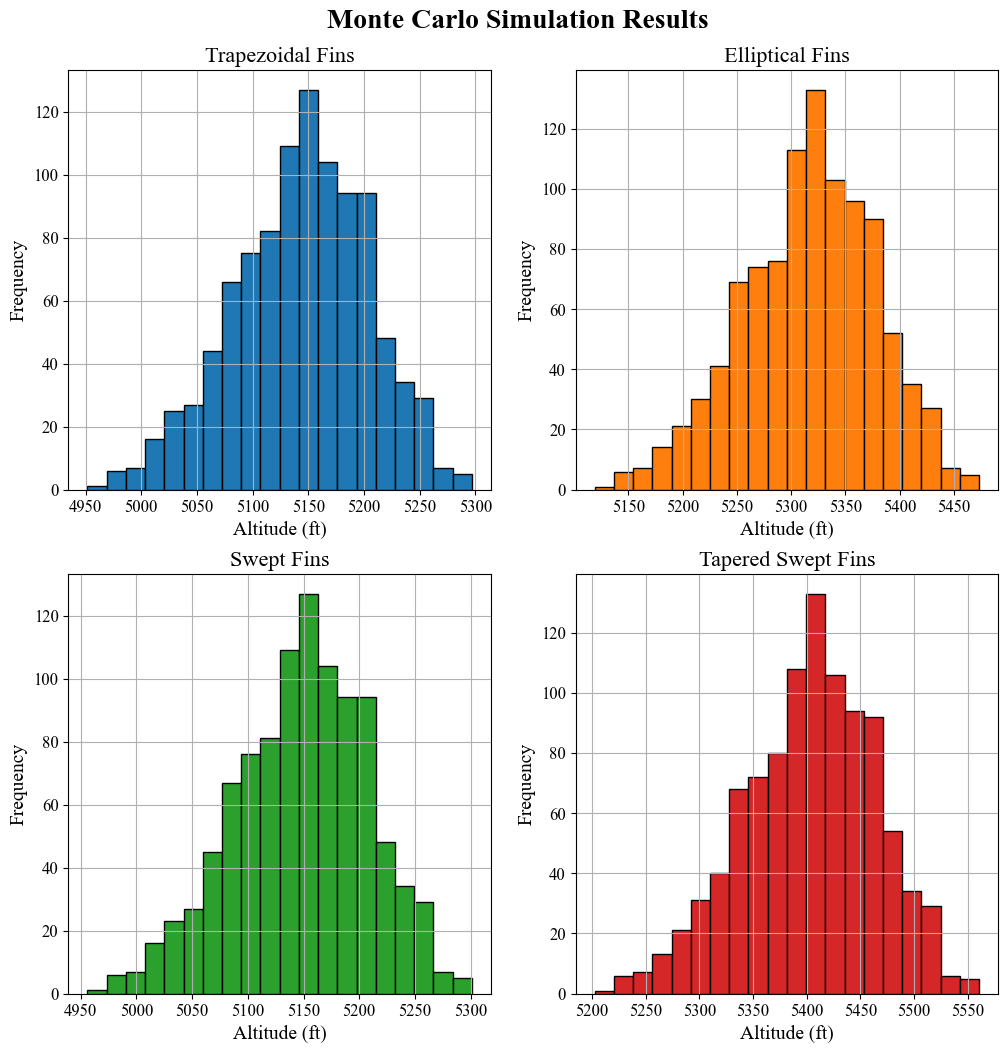

In [177]:
fig = plt.figure(figsize=(12, 12))
axes = fig.subplots(2, 2)

fig.suptitle('Monte Carlo Simulation Results', y=0.93)

axes[0, 0].hist(trap_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:blue')

axes[0, 1].hist(ellip_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:orange')

axes[1, 0].hist(swept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:green')

axes[1, 1].hist(tapswept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:red')

axes[0, 0].set_title('Trapezoidal Fins')
axes[0, 1].set_title('Elliptical Fins')
axes[1, 0].set_title('Swept Fins')
axes[1, 1].set_title('Tapered Swept Fins')

for ax in axes.flat:
    ax.grid()
    ax.set_xlabel('Altitude (ft)')
    ax.set_ylabel('Frequency')
    # ax.legend()

fig.savefig('Apogee Distributions Separate.png', dpi=500, bbox_inches='tight')

plt.show()

In [186]:
print(f'Trapezoidal Fins Mean Apogee Altitude = {np.mean(trap_apogee_altitudes):.2f}, Std Dev = {np.std(trap_apogee_altitudes):.3f}')
print(f'Elliptical Fins Mean Apogee Altitude = {np.mean(ellip_apogee_altitudes):.2f}, Std Dev = {np.std(ellip_apogee_altitudes):.3f}')
print(f'Swept Fins Mean Apogee Altitude = {np.mean(swept_apogee_altitudes):.2f}, Std Dev = {np.std(swept_apogee_altitudes):.3f}')
print(f'Tapered Swept Fins Mean Apogee Altitude = {np.mean(tapswept_apogee_altitudes):.2f}, Std Dev = {np.std(tapswept_apogee_altitudes):.3f}')

Trapezoidal Fins Mean Apogee Altitude = 5143.67, Std Dev = 60.264
Elliptical Fins Mean Apogee Altitude = 5316.71, Std Dev = 61.189
Swept Fins Mean Apogee Altitude = 5148.05, Std Dev = 60.214
Tapered Swept Fins Mean Apogee Altitude = 5402.78, Std Dev = 61.623


In [187]:
print(f'Trapezoidal Fins Mean Apogee Time = {np.mean(trap_apogee_times):.2f}, Std Dev = {np.std(trap_apogee_times):.3f}')
print(f'Elliptical Fins Mean Apogee Time = {np.mean(ellip_apogee_times):.2f}, Std Dev = {np.std(ellip_apogee_times):.3f}')
print(f'Swept Fins Mean Apogee Time = {np.mean(swept_apogee_times):.2f}, Std Dev = {np.std(swept_apogee_times):.3f}')
print(f'Tapered Swept Fins Mean Apogee Time = {np.mean(tapswept_apogee_times):.2f}, Std Dev = {np.std(tapswept_apogee_times):.3f}')

Trapezoidal Fins Mean Apogee Time = 17.49, Std Dev = 0.121
Elliptical Fins Mean Apogee Time = 17.78, Std Dev = 0.122
Swept Fins Mean Apogee Time = 17.50, Std Dev = 0.121
Tapered Swept Fins Mean Apogee Time = 17.96, Std Dev = 0.123


In [188]:
print(f'Trapezoidal Fins Mean Max Velocity = {np.mean(trap_max_velocity):.2f}, Std Dev = {np.std(trap_max_velocity):.3f}')
print(f'Elliptical Fins Mean Max Velocity = {np.mean(ellip_max_velocity):.2f}, Std Dev = {np.std(ellip_max_velocity):.3f}')
print(f'Swept Fins Mean Max Velocity = {np.mean(swept_max_velocity):.2f}, Std Dev = {np.std(swept_max_velocity):.3f}')
print(f'Tapered Swept Fins Mean Max Velocity = {np.mean(tapswept_max_velocity):.2f}, Std Dev = {np.std(tapswept_max_velocity):.3f}')

Trapezoidal Fins Mean Max Velocity = 690.51, Std Dev = 0.815
Elliptical Fins Mean Max Velocity = 702.07, Std Dev = 0.822
Swept Fins Mean Max Velocity = 690.60, Std Dev = 0.814
Tapered Swept Fins Mean Max Velocity = 703.79, Std Dev = 0.805


In [189]:
print(f'Trapezoidal Fins Mean Max Acceleration = {np.mean(trap_max_acceleration):.2f}, Std Dev = {np.std(trap_max_acceleration):.3f}')
print(f'Elliptical Fins Mean Max Acceleration = {np.mean(ellip_max_acceleration):.2f}, Std Dev = {np.std(ellip_max_acceleration):.3f}')
print(f'Swept Fins Mean Max Acceleration = {np.mean(swept_max_acceleration):.2f}, Std Dev = {np.std(swept_max_acceleration):.3f}')
print(f'Tapered Swept Fins Mean Max Acceleration = {np.mean(tapswept_max_acceleration):.2f}, Std Dev = {np.std(tapswept_max_acceleration):.3f}')

Trapezoidal Fins Mean Max Acceleration = 1248.94, Std Dev = 0.057
Elliptical Fins Mean Max Acceleration = 1248.89, Std Dev = 0.055
Swept Fins Mean Max Acceleration = 1248.94, Std Dev = 0.056
Tapered Swept Fins Mean Max Acceleration = 1248.89, Std Dev = 0.055


In [190]:
print(f'Trapezoidal Fins Mean Off-Rod Velocity = {np.mean(trap_off_rod_velocity):.2f}, Std Dev = {np.std(trap_off_rod_velocity):.3f}')
print(f'Elliptical Fins Mean Off-Rod Velocity = {np.mean(ellip_off_rod_velocity):.2f}, Std Dev = {np.std(ellip_off_rod_velocity):.3f}')
print(f'Swept Fins Mean Off-Rod Velocity = {np.mean(swept_off_rod_velocity):.2f}, Std Dev = {np.std(swept_off_rod_velocity):.3f}')
print(f'Tapered Swept Fins Mean Off-Rod Velocity = {np.mean(tapswept_off_rod_velocity):.2f}, Std Dev = {np.std(tapswept_off_rod_velocity):.3f}')

Trapezoidal Fins Mean Off-Rod Velocity = 93.78, Std Dev = 0.058
Elliptical Fins Mean Off-Rod Velocity = 95.16, Std Dev = 0.060
Swept Fins Mean Off-Rod Velocity = 93.78, Std Dev = 0.058
Tapered Swept Fins Mean Off-Rod Velocity = 95.17, Std Dev = 0.060


In [191]:
print(f'Trapezoidal Fins Mean Full Flight Duration = {np.mean(trap_full_flight_duration):.2f}, Std Dev = {np.std(trap_full_flight_duration):.3f}')
print(f'Elliptical Fins Mean Full Flight Duration = {np.mean(ellip_full_flight_duration):.2f}, Std Dev = {np.std(ellip_full_flight_duration):.3f}')
print(f'Swept Fins Mean Full Flight Duration = {np.mean(swept_full_flight_duration):.2f}, Std Dev = {np.std(swept_full_flight_duration):.3f}')
print(f'Tapered Swept Fins Mean Full Flight Duration = {np.mean(tapswept_full_flight_duration):.2f}, Std Dev = {np.std(tapswept_full_flight_duration):.3f}')

Trapezoidal Fins Mean Full Flight Duration = 107.96, Std Dev = 1.028
Elliptical Fins Mean Full Flight Duration = 110.76, Std Dev = 1.017
Swept Fins Mean Full Flight Duration = 108.06, Std Dev = 1.006
Tapered Swept Fins Mean Full Flight Duration = 111.71, Std Dev = 1.023


In [192]:
print(f'Trapezoidal Fins Mean Ground Hit Velocity = {np.mean(trap_ground_hit_velocity):.2f}, Std Dev = {np.std(trap_ground_hit_velocity):.3f}')
print(f'Elliptical Fins Mean Ground Hit Velocity = {np.mean(ellip_ground_hit_velocity):.2f}, Std Dev = {np.std(ellip_ground_hit_velocity):.3f}')
print(f'Swept Fins Mean Ground Hit Velocity = {np.mean(swept_ground_hit_velocity):.2f}, Std Dev = {np.std(swept_ground_hit_velocity):.3f}')
print(f'Tapered Swept Fins Mean Ground Hit Velocity = {np.mean(tapswept_ground_hit_velocity):.2f}, Std Dev = {np.std(tapswept_ground_hit_velocity):.3f}')

Trapezoidal Fins Mean Ground Hit Velocity = 14.83, Std Dev = 0.233
Elliptical Fins Mean Ground Hit Velocity = 14.72, Std Dev = 0.233
Swept Fins Mean Ground Hit Velocity = 14.83, Std Dev = 0.224
Tapered Swept Fins Mean Ground Hit Velocity = 14.72, Std Dev = 0.238


In [193]:
print(f'Trapezoidal Fins Mean Off-Rod Stability = {np.mean(trap_off_rod_stability):.2f}, Std Dev = {np.std(trap_off_rod_stability):.3f}')
print(f'Elliptical Fins Mean Off-Rod Stability = {np.mean(ellip_off_rod_stability):.2f}, Std Dev = {np.std(ellip_off_rod_stability):.3f}')
print(f'Swept Fins Mean Off-Rod Stability = {np.mean(swept_off_rod_stability):.2f}, Std Dev = {np.std(swept_off_rod_stability):.3f}')
print(f'Tapered Swept Fins Mean Off-Rod Stability = {np.mean(tapswept_off_rod_stability):.2f}, Std Dev = {np.std(tapswept_off_rod_stability):.3f}')

Trapezoidal Fins Mean Off-Rod Stability = nan, Std Dev = nan
Elliptical Fins Mean Off-Rod Stability = nan, Std Dev = nan
Swept Fins Mean Off-Rod Stability = nan, Std Dev = nan
Tapered Swept Fins Mean Off-Rod Stability = nan, Std Dev = nan
